# Data Preprocessing
Here I will clean and refactor the data to get it ready for analysis and machine learning.

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
%matplotlib inline

In [2]:
# Load raw data
df = pd.read_csv('../data/ibm_hr_analytics.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Feature optimization

In [3]:
# Drop unnecessary features
df = df.drop('EmployeeCount', axis=1) # Constant value (how many employees each record encompasses, this is implied to be 1)
df = df.drop('EmployeeNumber', axis=1) # Unique value - not relevant
df = df.drop('Over18', axis=1) # Constant value
df = df.drop('StandardHours', axis=1) # Constant value

In [4]:
# Remove zeros (instead of excluding their current company, we will include it)
df['NumCompaniesWorked'] = df['NumCompaniesWorked'] + 1

In [5]:
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1381,28,No,Non-Travel,1103,Research & Development,16,3,Medical,3,Male,...,3,3,0,5,3,2,5,3,1,4
1351,48,No,Travel_Frequently,117,Research & Development,22,3,Medical,4,Female,...,3,2,1,24,3,3,22,17,4,7
175,56,No,Travel_Rarely,713,Research & Development,8,3,Life Sciences,3,Female,...,3,3,1,19,3,3,2,2,2,2
351,32,No,Travel_Rarely,1062,Research & Development,2,3,Medical,3,Female,...,3,3,1,8,4,3,8,0,0,7
252,29,No,Travel_Rarely,665,Research & Development,15,3,Life Sciences,3,Male,...,3,1,0,6,1,3,6,5,1,5


## Refactoring to Numeric

In [6]:
# Convert Yes/No to bool before the automatic string factorization (which could choose an integer value at random)
df['Attrition'] = df['Attrition'].map({'Yes': True, 'No': False})
df['OverTime'] = df['OverTime'].map({'Yes': True, 'No': False})

In [7]:
# Create a dictionary to store string value mappings
mappings = {}

In [8]:
# Factorize and store values into original DataFrame and mappings dict
for column in df.select_dtypes(include='object'):
    df[column], mapping = df[column].factorize()
    mappings[column] = dict(enumerate(mapping))

In [9]:
mappings

{'BusinessTravel': {0: 'Travel_Rarely',
  1: 'Travel_Frequently',
  2: 'Non-Travel'},
 'Department': {0: 'Sales', 1: 'Research & Development', 2: 'Human Resources'},
 'EducationField': {0: 'Life Sciences',
  1: 'Other',
  2: 'Medical',
  3: 'Marketing',
  4: 'Technical Degree',
  5: 'Human Resources'},
 'Gender': {0: 'Female', 1: 'Male'},
 'JobRole': {0: 'Sales Executive',
  1: 'Research Scientist',
  2: 'Laboratory Technician',
  3: 'Manufacturing Director',
  4: 'Healthcare Representative',
  5: 'Manager',
  6: 'Sales Representative',
  7: 'Research Director',
  8: 'Human Resources'},
 'MaritalStatus': {0: 'Single', 1: 'Married', 2: 'Divorced'}}

## Create a new profile report

In [10]:
profile = ProfileReport(df, title='Cleaned Data Profile', dark_mode=True)
# profile.to_file('../reports/cleaned_data_profile.html') # Uncomment if you want to export again

The profile exported better than last time. Let's attempt to visualize some correlations.

## Figure Creation

In [11]:
# Choose a style
plt.style.use('seaborn-v0_8')

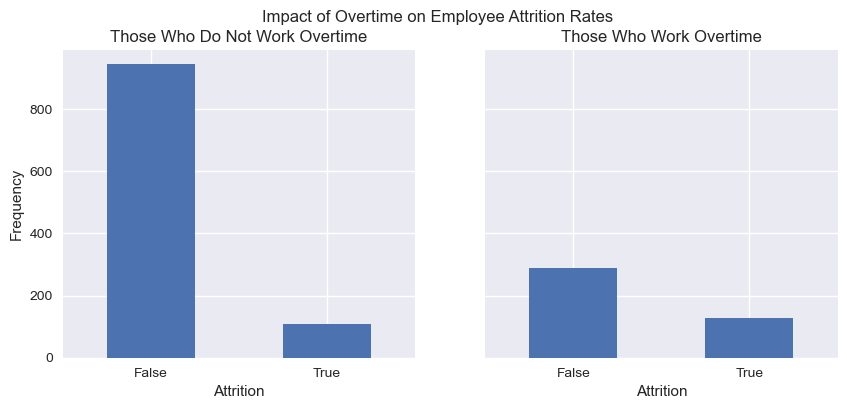

In [12]:
# How overtime affects the rate of attrition
fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(10, 4))

# Add plots
ax[0].set(title='Those Who Do Not Work Overtime')
df[df['OverTime'] == False]['Attrition'].value_counts().plot(ax=ax[0], kind='bar')
ax[1].set(title='Those Who Work Overtime')
df[df['OverTime'] == True]['Attrition'].value_counts().plot(ax=ax[1], kind='bar')

# Adjust labels
fig.suptitle('Impact of Overtime on Employee Attrition Rates')
for plot in ax:
    plot.set(ylabel='Frequency')
    plot.tick_params(axis='x', labelrotation=0)

fig.savefig('../reports/figures/impact_of_overtime_on_attrition.png')
plt.show()

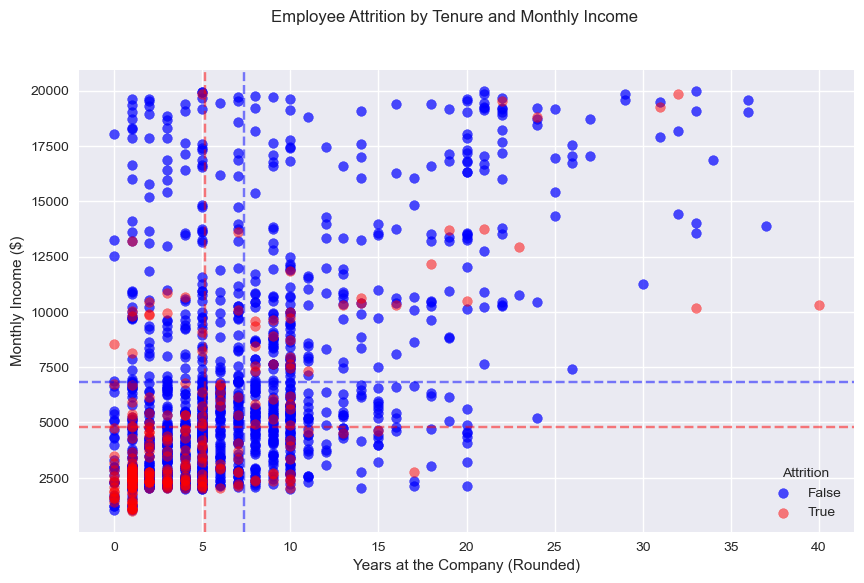

In [13]:
# Find a relationship between tenure, income, and attrition
fig, ax = plt.subplots(figsize=(10, 6))

# Plot both seperately to control alpha and overlap behavior
df_true = df[df['Attrition'] == True]
df_false = df[df['Attrition'] == False]
ax.scatter(df_false['YearsAtCompany'], 
           df_false['MonthlyIncome'],
           color='blue', 
           label='False',
           alpha=0.7)
ax.scatter(df_true['YearsAtCompany'], 
           df_true['MonthlyIncome'],
           color='red', 
           label='True',
           alpha=0.5)

# Add meanlines for easy comparison
ax.axhline(df_false['MonthlyIncome'].mean(), color='blue', linestyle='--', alpha=0.5)
ax.axvline(df_false['YearsAtCompany'].mean(), color='blue', linestyle='--', alpha=0.5)
ax.axhline(df_true['MonthlyIncome'].mean(), color='red', linestyle='--', alpha=0.5)
ax.axvline(df_true['YearsAtCompany'].mean(), color='red', linestyle='--', alpha=0.5)

# Add labels
fig.suptitle('Employee Attrition by Tenure and Monthly Income')
ax.legend(['False', 'True'], title='Attrition', loc='lower right')
ax.set(xlabel='Years at the Company (Rounded)',
       ylabel='Monthly Income ($)')

# Save and show
fig.savefig('../reports/figures/attrition_by_tenure_and_income.png')
plt.show()

## Splitting the Data

In [14]:
# Split the data into X and y
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [15]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Save

In [20]:
# Save our cleaned data to new files
df.to_csv('../data/ibm_hr_analytics_cleaned.csv', index=False)
X_train.to_csv('../data/X_train.csv', index=False)
y_train.to_csv('../data/y_train.csv', index=False)
X_test.to_csv('../data/X_test.csv', index=False)
y_test.to_csv('../data/y_test.csv', index=False)

In [21]:
# Save the data mappings dict
pd.DataFrame(mappings).to_json('../data/mappings.json')